Bert Research Paper : https://arxiv.org/pdf/1810.04805.pdf#cite.wu-etal%3A2016%3A_googl

# General Idea

* Bert - Bidirectional Encoder Representation from Transformers
* smaller bert models are required ( personal systems)
* distillbert runs 60% faster than bert keeping 95% of berts accuracy 

* MLM enables/enforces bidirectional learning from text by masking (hiding) a word in a sentence and forcing BERT to bidirectionally use the words on either side of the covered word to predict the masked word. 
* A random 15% of tokenized words are hidden during training and BERT’s job is to correctly predict the hidden words.
* NSP (Next Sentence Prediction) is used to help BERT learn about relationships between sentences by predicting if a given sentence follows the previous sentence or not.
* In training, 50% correct sentence pairs are mixed in with 50% random sentence pairs to help BERT increase next sentence prediction accuracy.

|parameters|	Number of learnable variables/values available for the model|
|:---------|:--------|
|Transformer Layers|	Number of Transformer blocks. A transformer block transforms a sequence of word representations to a sequence of contextualized words (numbered representations|
|Hidden Size| 	Layers of mathematical functions, located between the input and output, that assign weights (to words) to produce a desired result.|
|Attention Heads| 	The size of a Transformer block|
|Processing|	Type of processing unit used to train the model|
|Length of Training| 	Time it took to train the model|


**What is GLUE Benchmark ?** 

The General Language Understanding Evaluation (GLUE) benchmark is a collection of resources for training, evaluating, and analyzing natural language understanding systems. GLUE consists of:
* A benchmark of nine sentence- or sentence-pair language understanding tasks built on established existing datasets and selected to cover a diverse range of dataset sizes, text genres, and degrees of difficulty,
* A diagnostic dataset designed to evaluate and analyze model performance with respect to a wide range of linguistic phenomena found in natural language, and
* A public leaderboard for tracking performance on the benchmark and a dashboard for visualizing the performance of models on the diagnostic set.

The format of the GLUE benchmark is model-agnostic, so any system capable of processing sentence and sentence pairs and producing corresponding predictions is eligible to participate. The benchmark tasks are selected so as to favor models that share information across tasks using parameter sharing or other transfer learning techniques. The ultimate goal of GLUE is to drive research in the development of general and robust natural language understanding systems.


| Task | Example| Dataset   | Metric|
|:------|:------|:----------|:------|
| Grammatical| "The cat is on the mat." (Grammatically correct) vs. "Cat the mat on is the." (Grammatically incorrect)| CoLA| Matthews|
| Sentimental Analysis| "I loved the movie; it was amazing!" (Positive sentiment) vs. "The movie was terrible; I hated it." (Negative sentiment) | SST-2| Accuracy|
| Similarity| "The car is speeding down the road." vs. "A car is driving quickly on the street." | STS-B     | Pearson/Spearman|
| Paraphrase| "The cat is on the mat." vs. "The mat has a cat on it."| MRPC| Accuracy/f1|
| QA| "What is the capital of France?" vs. "Paris is the capital of France" | QQP| Accuracy/f1|
| Contradiction| "The sun is setting over the mountains." vs. "It's the middle of the day, and the sun is high in the sky." | MNLI-mm| Accuracy             |
| Answerable| "What is the capital of France?" (Context: "Paris is the capital of...")| QNLI| Accuracy|
| Entail| "If it's raining, I'll take an umbrella." vs. "It's raining."| RTE| Accuracy|
| Ambiguous Pronouns| "She went to the store and bought a book.It was interesting." (What does "it" refer to?) | WNLI| Accuracy|

## Bert Architecture

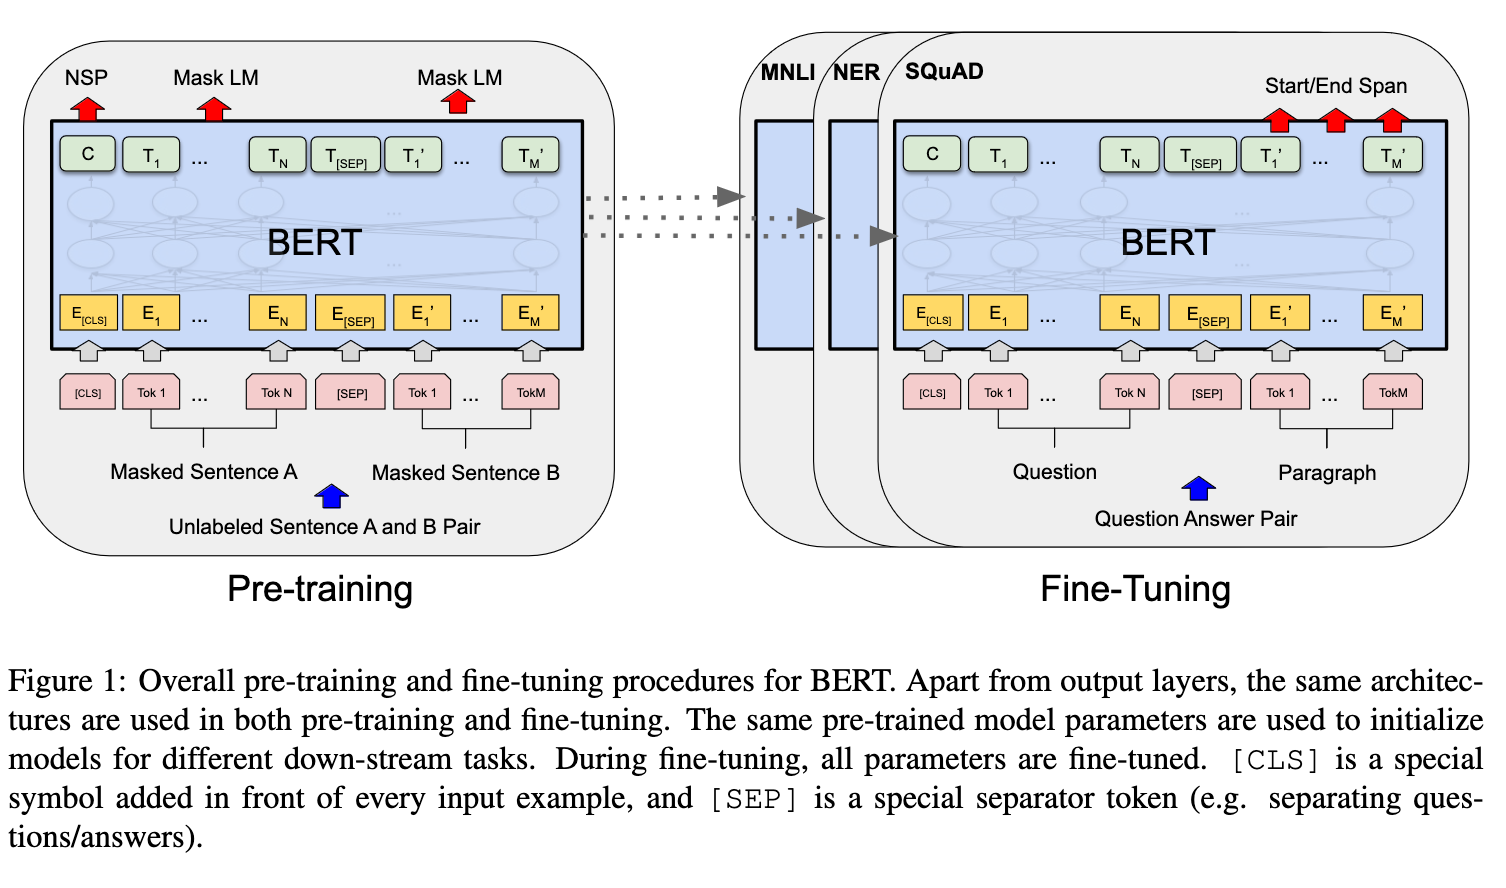

 There are two steps in the BERT Framwork; pre-training and fine-tuning. During pre-training the model is trained on unlabeled data over different pre-training tasks. For fine-tuning, the BERT model is first initialized with the pre-trained parameters, and all of the parameters are fine-tuned using labeled data from the downstream tasks. Each downstream task has separate fine-tuned models, even though they initialized with the same pre-trained parameteres. 

### Parameters
There are two BERT models primarily. Bert base and Bert  large. Following are the parameters for these models. 

|Transformer Layers| Hidden Size| 	Attention Heads |	Parameters 	|Processing |Length of Training|
|:---------|:--------|:---------|:--------|:---------|:--------|
|BERTbase 	|12 	|768 	|12 	|110M 	|4 TPUs 	|4 days|
|BERTlarge 	|24 	|1024 	|16 	|340M 	|16 TPUs 	|4 days|


### Input Representation
The input representation is able to unambiguously represent both a single sentence and a pair of sentence in one token sequence. A sequence refers to the input token sequence to BERT, which may be single sentence or two sentences packed together. 

* Input sequence is embedded using three methods;
    * Token embedding (done by wordpiece embeddings(~30k vocabulary size)
    * Segment Embedding ( to show the separation between sentences(A &B) 
    * Position embedding
    

* The first token of every sequence is always a special classification token `[CLS]`. The final hidden state corresponding to this token is used as the aggregate sequence representation for classification tasks. 
* Sentence pairs are packed together into a single sequence. We differentiate the sentences in two ways. First, we separate them with a special token `[SEP]`. Second, 

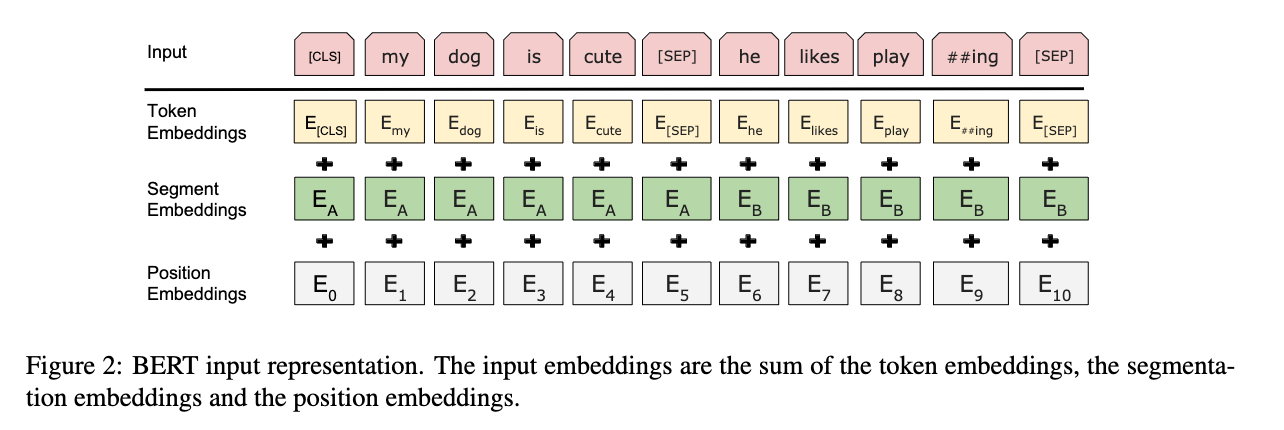

## Pretraining BERT 
### 1. Masked Language Model (MLM)

A deep bidirectional model is strictly more powerful than either a left-to-right model or the shallow concatenation of a left-to-right and a right-to-left model. 

In order to train a deep bidirectional representation, we simply mask some percentage of the input tokens at random, and then predict those masked tokens. We refer this procedure as a `masked language model`. 15% of all WordPiece tokens in each sequence at random are masked.

The final hidden vectors corresponding to the mask tokens are fed into an output softmax over the vocabulary. 

In contrast to denoising auto-encoders, we only predict the masked words rather than reconstructing the entire input. 

If a token is selected for masking; 
* 80% of the time : replace the word with `[MASK]` token.
* 10% of the time : replace with a random word 
* 10% of the time : keep the word unchanged. 


### 2. Next Sentence Prediction (NSP)
Many important downstream tasks such as question-answering and natural language inference are based on understanding the relationship between two sentences, which is not directly captured by language modeling. 

In order to train a model that understands sentence relationships, we pre-train for a binarized next sentence prediction task. 

When choosing the sentences A and B for each pre-training example, 50% of the time B is the actual next sentence that follows A(labeled as IsNext), and 50% of the time it is a random sentence from the corpus(labeled as NotNext). 

## Fine Tuning Bert 
The pre-trained BERT model can be fine-tuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial task-specific architecture modifications

## Usage Tips 

* BERT is a model with absolute position embeddings so it’s usually advised to pad the inputs on the right rather than the left.

* BERT was trained with the masked language modeling (MLM) and next sentence prediction (NSP) objectives. It is efficient at predicting masked tokens and at NLU in general, but is not optimal for text generation.

## Token Classification
* Named entity recognition (NER): Finding the entities (persons, locations or organizations) in a sentence. This can be formulated as attributing a label to each token by having one class per entity and one class for no entity. 

* Part of speech tagging (POS): Mark each word in a sentence as corresponding to a particular part of speech(noun, verb, pronoun ...) 

* chunking : finding tokens belongs to the same entity. This task can be formulated as attributing one label to any tokens that are at the beginning of a chunk, another label to tokens that are inside a chunk, and a third label to tokens that dont belong to any chunk. 